# CS4035 - Cyber Data Analytics
## Lab 3 

## 8. Bonus Task 1/2 A4

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

from tqdm import tqdm

from jupyterthemes import jtplot
jtplot.style('grade3')

import warnings
warnings.filterwarnings('ignore')

### 8a. Provide implementation and analysis.

In [2]:
def smote(X,y):
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X, y)
    return X_res, y_res

In [3]:
Botnet = [
    "147.32.84.165", "147.32.84.191", "147.32.84.192", "147.32.84.193",
    "147.32.84.204", "147.32.84.205", "147.32.84.206", "147.32.84.207",
    "147.32.84.208", "147.32.84.209"
]

In [4]:
# load data
raw_source9 = pd.read_csv('./dataset/dataset_9/capture20110817.binetflow')
raw_source10 = pd.read_csv('./dataset/dataset_10/capture20110818.binetflow')
raw_source11 = pd.read_csv('./dataset/dataset_11/capture20110818-2.binetflow')
raw_source12 = pd.read_csv('./dataset/dataset_12/capture20110819.binetflow')

source_list = [raw_source9, raw_source10, raw_source11, raw_source12]

encoder_list = []
# preprocessing: pruning, Labelling, fillna, encoding
for i in tqdm(range(len(source_list))):
    enc = OrdinalEncoder()
    source_list[i] = source_list[i][~(source_list[i]).Label.str.contains("Background")] # background flows removed
    source_list[i].drop(columns = ["StartTime"], inplace=True) # drop timestamp
    source_list[i]["Botnet"] = source_list[i]['SrcAddr'].isin(Botnet) # tag
    source_list[i].drop(columns = ['SrcAddr'], inplace=True)
    for col in source_list[i].columns: # fill NAN
        if(type(source_list[i][col].values[0]) == str):
            source_list[i][col].fillna(value="unknown", inplace=True)
        else:
            source_list[i][col].fillna(value=source_list[i][col].mean(), inplace=True)
    source_list[i] = enc.fit_transform(source_list[i])
    encoder_list.append(enc)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


In [5]:
X = []
y = []
for i in range(len(source_list)):
    X.append(source_list[i][:, :-1])
    y.append(source_list[i][:, -1])

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:37<00:00,  9.29s/it]


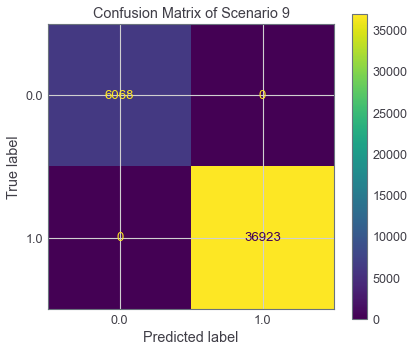

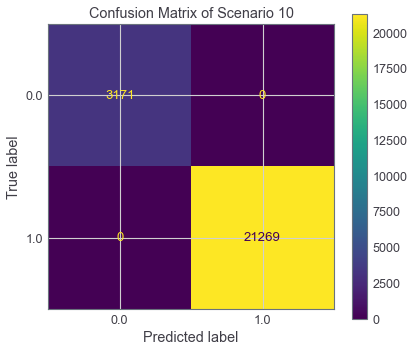

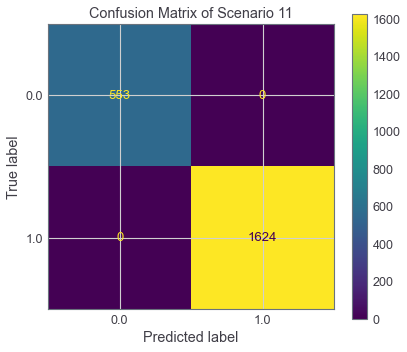

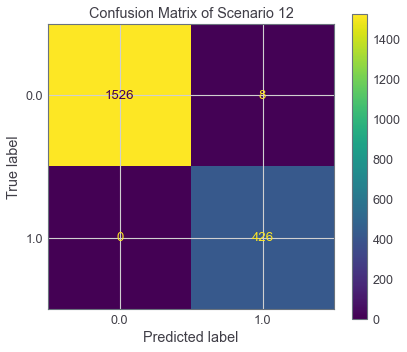

In [6]:
rf = RandomForestClassifier(n_estimators=200, max_depth=3)
for i in tqdm(range(len(source_list))):
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X[i],
                                                        y[i],
                                                        test_size=0.2,
                                                        random_state=42)
    # smote
    X_train_smote, y_train_smote = smote(X_train, y_train)
    rf.fit(X_train_smote, y_train_smote)
    plot_confusion_matrix(rf, X_test, y_test)
    plt.title('Confusion Matrix of Scenario ' + str(9 + i))
plt.show()